In [1]:
#data frames and data manipulation
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error

# Data Preprocessing

In [3]:
data = pd.read_csv(r'datasets/spotify/spotify_songs.csv')
data.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

## Description of dataset

* **Track_id :** Song unique ID
* **Track_name :** Song Name
* **Track_artist :** Song Artist
* **Track_popularity :** Song Popularity (0-100) where higher is better
* **Track_album_id :** Album unique ID
* **Track_album_name :** Song album name
* **Track_album_release_date :** Date when album released
* **Playlist_name :** Name of playlist
* **Playlist_id :** Playlist ID
* **Playlist_genre :** Playlist genre
* **Playlist_subgenre :** Playlist subgenre
* **Danceability :** describes how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable.
* **Energy :** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. 
* **Key :** The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* **Loudness :** The overall loudness of a track in decibels (dB)
* **Mode :** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* **Speechiness :** Speechiness detects the presence of spoken words in a track.The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
* **Acousticness :** A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
* **Instrumentalness :** Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
* **Liveness :** Detects the presence of an audience in the recording.
* **Valence :** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
* **Tempo :** The overall estimated tempo of a track in beats per minute (BPM).
* **Duration_ms :** Duration of song in milliseconds

In [4]:
# Splitting features and target 
x_data = data.drop('track_popularity',axis = 1)
y_data = data['track_popularity']

print(f'Shape of x_train {x_data.shape} and y_data {y_data.shape}')

Shape of x_train (32833, 22) and y_data (32833,)


**Removing all identifying features**

All identifying features have the dtype of "Object," and the only potentially useful features with that dtype are Genre and Subgenre. However, for now, all "Objects" are excluded.

In [5]:
x_data = x_data.select_dtypes(exclude=['object'])
x_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


# Visualization of features and target

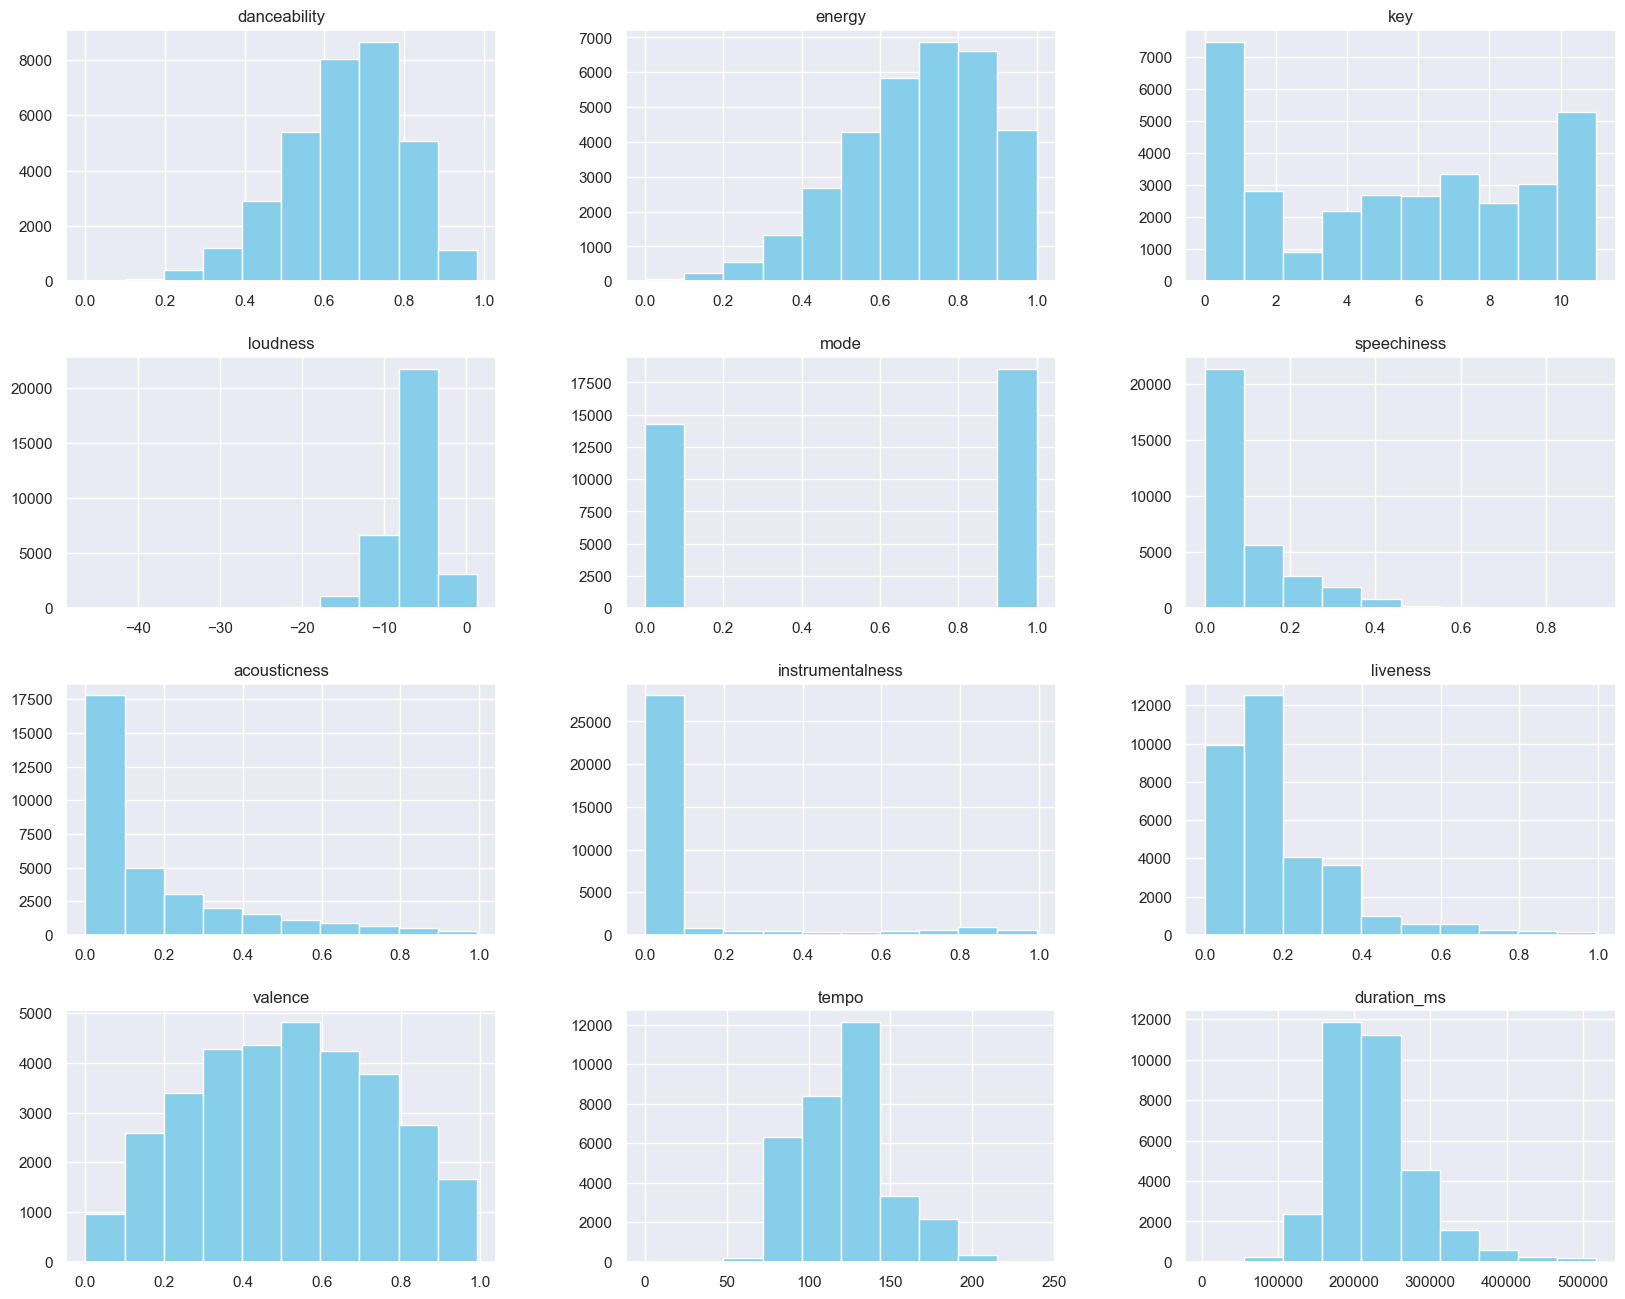

In [6]:
sns.set(rc={'figure.figsize': (20, 16)})
x_data.hist(color='skyblue');

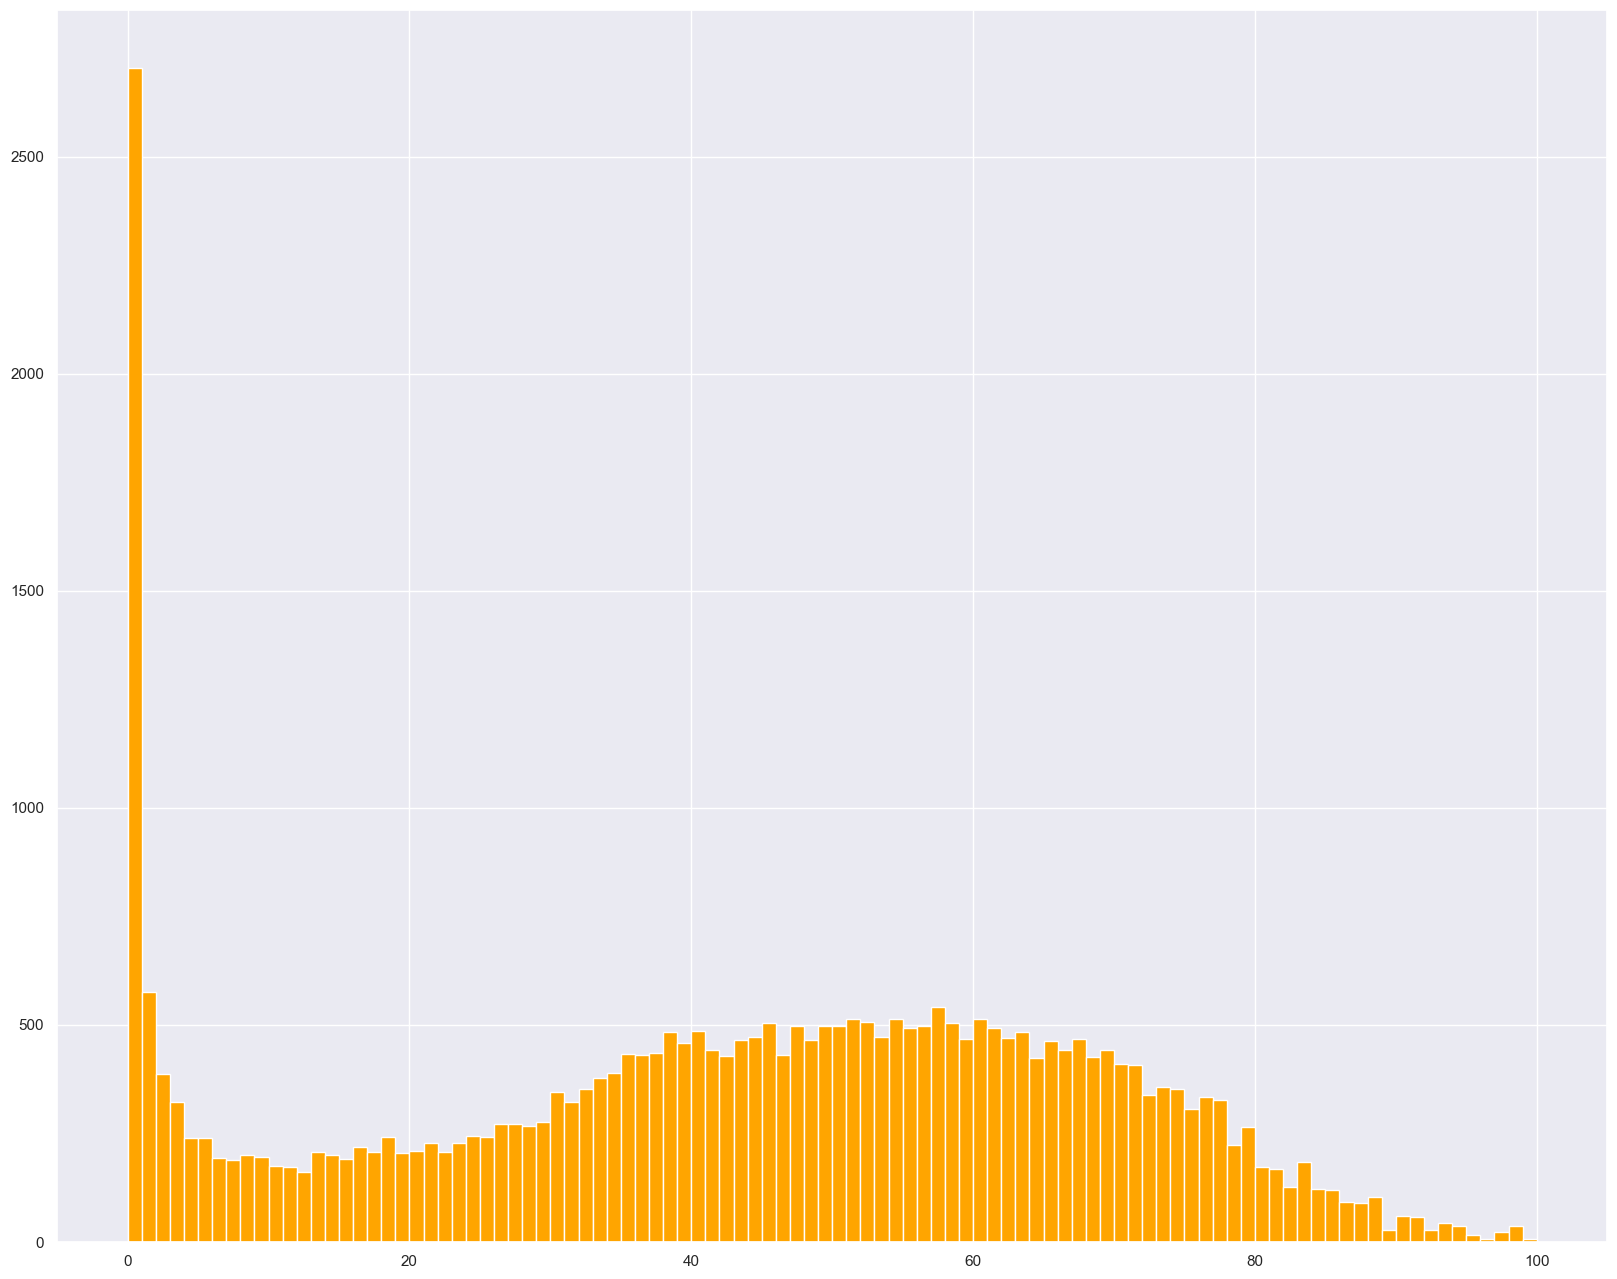

In [7]:
y_data.hist(color='orange',bins = 100);

# Test/training split and feature scaling using z-score 

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

# Standardize the features (optional but can help with model performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the regressors and define parametergrid

In [9]:
# List of models to perform grid search on with possiblity to add more if needed
models_to_search = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    #ExtraTreesRegressor(),
    #AdaBoostRegressor(),
    #BaggingRegressor()
    ]

# Define the hyperparameters and values to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Performing hyperparameter Randomized search with cross-validation

In [10]:
# Create a dictionary to store the best model and its corresponding MAE
best_model_info = {'model': None, 'params': None, 'mae': float('inf')}

# Loop through each model and perform randomized search
for model in models_to_search:
    random_search = RandomizedSearchCV(model, param_grid, n_iter=10, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
    random_search.fit(X_train_scaled, y_train)

    # Get the best model and its parameters
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_

    # Predict on the validation set and round the predicted values
    y_pred = best_model.predict(X_test_scaled)
    y_pred_rounded = np.round(y_pred)  # Round the predicted values as the target is int
    mae = mean_absolute_error(y_test, y_pred_rounded)

    # Update the best_model_info if the current model has lower MAE
    if mae < best_model_info['mae']:
        best_model_info['model'] = best_model
        best_model_info['params'] = best_params
        best_model_info['mae'] = mae

# Print the best model information
print(f"Best Model: {best_model_info['model']}")
print(f"Best Parameters: {best_model_info['params']}")
print(f"Lowest Mean Absolute Error: {best_model_info['mae']}")

Best Model: GradientBoostingRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=5,
                          n_estimators=150)
Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}
Lowest Mean Absolute Error: 16.42467005076142


# Calculating feature importance

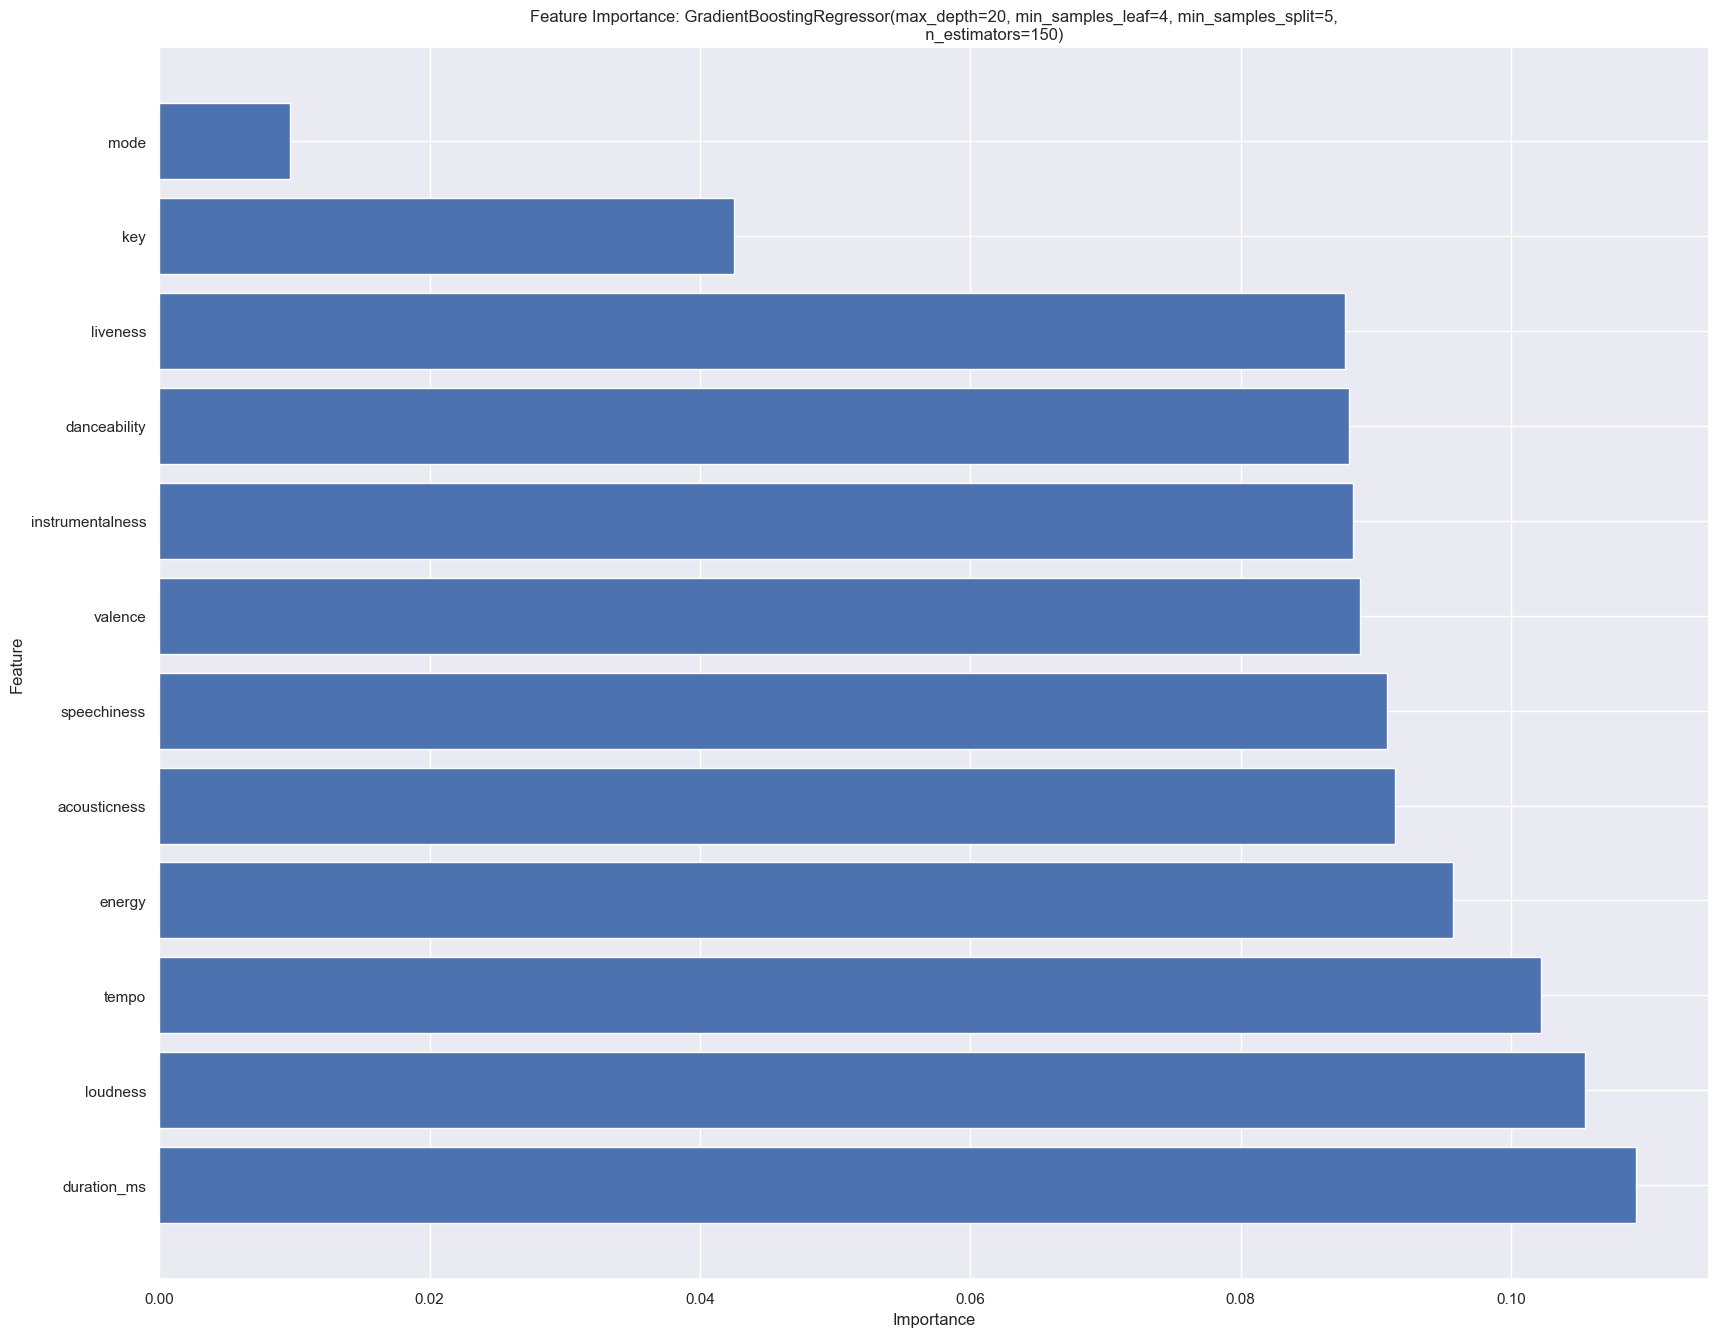

In [11]:
# Plot feature importance for the best model
feature_importance = best_model_info['model'].feature_importances_

# Get feature names
feature_names = x_data.columns

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx])
plt.yticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=0)  # Use yticks instead of xticks
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f"Feature Importance: {best_model_info['model']}")
plt.show()